['x_train', 'y_train', 'x_test', 'y_test']


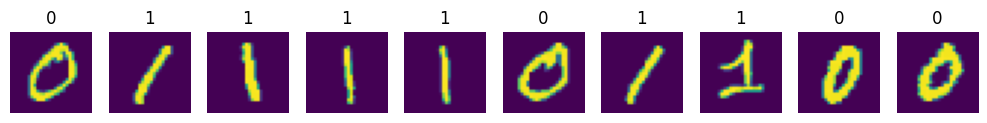

In [1]:
import matplotlib.pyplot as plt
import numpy as np


lib = np.load('mnist_binary_01.npz')
print(lib.files)
X_train_3D = lib['x_train']
Y_train = lib['y_train']


fig = plt.figure(figsize=(10, 10))
for i in range(10):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_train_3D[i])
    plt.title(str(Y_train[i]))
    plt.axis('off')
    plt.tight_layout()
plt.show()

In [2]:
from one_hot_encode import oneHotEncode


In [6]:
Y = [5, 0, 4, 1, 9, 2, 1, 3, 1, 4]
print(Y)
print(oneHotEncode(Y, 10))
one_hot = oneHotEncode(Y, 10)

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [7]:
from one_hot_decode import one_hot_decode
print(one_hot_decode(one_hot))

[5 0 4 1 9 2 1 3 1 4]


cost for iteration0 is 14.507885173282103
cost for iteration2 is 0.5015505842993981
cost for iteration4 is 0.31881607762265635
cost for iteration6 is 0.25767545629278743
cost for iteration8 is 0.2201625029720261


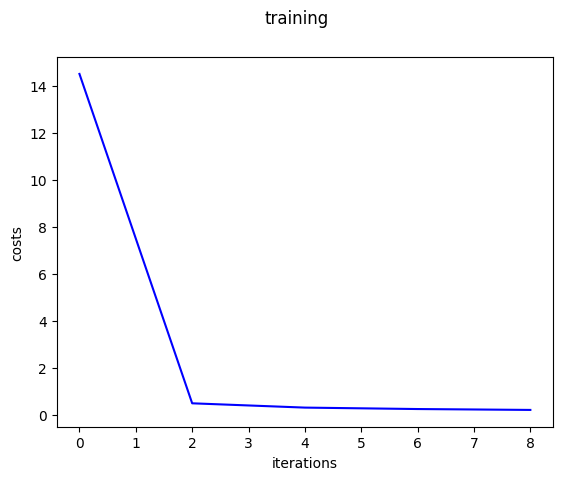

Train cost: 0.1950359878293627
Train accuracy: 98.22345045400711%
Dev cost: 0.1950359878293627
Dev accuracy: 98.22345045400711%


In [2]:
from deepneuralnetwork import DeepNeuralNetwrok
import numpy as np
lib_train = np.load('mnist_binary_01.npz')
X_3D, Y = lib_train['x_train'], lib_train['y_train']
X = X_3D.reshape((X_3D.shape[0], -1))
X = X / 255.0  # Normalize pixel values to [0, 1]

# Ensure Y has proper shape
if Y.ndim == 1:
    Y = Y.reshape(1, -1)
np.random.seed(0)
deep = DeepNeuralNetwrok(X.shape[1], [5, 3, 1], activation='tanh')
A, cost = deep.train(X, Y)
accuracy = np.sum(A == Y) / Y.shape[1] * 100
print("Train cost:", cost)
print("Train accuracy: {}%".format(accuracy))
A, cost = deep.evaluate(X, Y)
accuracy = np.sum(A == Y) / Y.shape[1] * 100
print("Dev cost:", cost)
print("Dev accuracy: {}%".format(accuracy))
deep.save('27-output')


In [4]:
deep.save("mymodel")
